# Project: Arabic Handwritten Digits Recognition

## Table of Contents
### 1. [Loading Data](#load)
### 2. [Preprocessing](#pre)
### 3. [ANN Model](#ann)
### 4. [ANN Model Evaluation](#ann_eval)   
### 5. [CNN Model](#cnn)
### 6. [Model Evaluation](#cnn_eval)
### 7. [Conclusion](#conclusion)

In [1]:
import pandas as pd
import numpy as np
import zipfile
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from utils import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id='load'></a>
## Loading the data 

In [2]:
# Open the zip file for reading
with zipfile.ZipFile('data.zip', 'r') as extracter:
    # Extract all contents of the zip file to a directory
    extracter.extractall('data/')

In [3]:
X_train = pd.read_csv('data/csvTrainImages 60k x 784.csv', header=None)
y_train = pd.read_csv('data/csvTrainLabel 60k x 1.csv', header=None)
X_test = pd.read_csv('data/csvTestImages 10k x 784.csv', header=None)
y_test = pd.read_csv('data/csvTestLabel 10k x 1.csv', header=None)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (60000, 784)
y_train shape: (60000, 1)
X_test shape: (10000, 784)
y_test shape: (10000, 1)


In [4]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train.head()

,0
0,0
1,1
2,2
3,3
4,4


So our X_train data contains the images pixels (28x28) and the y_train contains the corresponding number of this image

Checking if the data has any missing values

In [6]:
X_train.isnull().any().any(), y_train.isnull().any().any()

(False, False)

In [7]:
X_test.isnull().any().any(), y_test.isnull().any().any()

(False, False)

That's Great Look like our data has no missing values.

Converting our dataframe into numpy arrays

In [8]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

<a id='pre'></a>
## Preproccesing

Scaling our Training Matrix to be from (0-1) for Better Performance and Better convergence and Avoiding bias

In [9]:
X_train = X_train / 255.0 # Normalize pixel values
X_test = X_test / 255.0 # Normalize pixel values

### Lets plot the some images of our training dataset

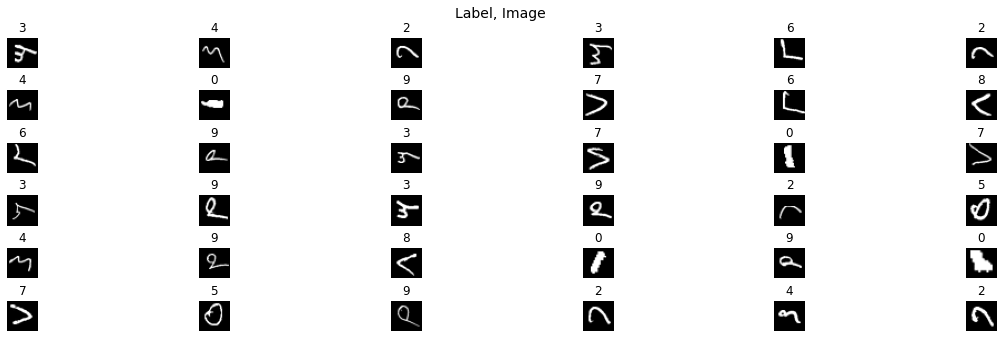

In [10]:
display_images(X_train, y_train)

### Splitting Data

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

<a id="ann"></a>
## Building The ANN Model

In [12]:
ann_model = Sequential(
    [
        Dense(784, activation='relu', name='input_layer'),
        Dense(128, activation='relu', name='hidden_layer1', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.25),
        Dense(10, activation='sigmoid', name='output_layer')
    ]
)
ann_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = ann_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2272 - accuracy: 0.9628 - val_loss: 0.1339 - val_accuracy: 0.9741
Epoch 2/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0951 - accuracy: 0.9831 - val_loss: 0.0869 - val_accuracy: 0.9826
Epoch 3/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0706 - accuracy: 0.9882 - val_loss: 0.0720 - val_accuracy: 0.9879
Epoch 4/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0602 - accuracy: 0.9904 - val_loss: 0.0726 - val_accuracy: 0.9857
Epoch 5/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0488 - accuracy: 0.9928 - val_loss: 0.0705 - val_accuracy: 0.9872
Epoch 6/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0462 - accuracy: 0.9933 - val_loss: 0.0679 - val_accuracy: 0.9887
Epoch 7/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0427 - accuracy: 0.9939 - val_loss: 0.0562 -

Epoch 57/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0157 - accuracy: 0.9989 - val_loss: 0.0781 - val_accuracy: 0.9902
Epoch 58/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0157 - accuracy: 0.9989 - val_loss: 0.0731 - val_accuracy: 0.9890
Epoch 59/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0150 - accuracy: 0.9991 - val_loss: 0.0602 - val_accuracy: 0.9908
Epoch 60/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0206 - accuracy: 0.9986 - val_loss: 0.0948 - val_accuracy: 0.9896
Epoch 61/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0134 - accuracy: 0.9993 - val_loss: 0.0793 - val_accuracy: 0.9905
Epoch 62/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0151 - accuracy: 0.9990 - val_loss: 0.0909 - val_accuracy: 0.9904
Epoch 63/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0181 - accuracy: 0.9987 - val_loss: 0

In [13]:
ann_model.summary() # Previewing the ann_model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (32, 784)                 615440    
                                                                 
 hidden_layer1 (Dense)       (32, 128)                 100480    
                                                                 
 dropout (Dropout)           (32, 128)                 0         
                                                                 
 output_layer (Dense)        (32, 10)                  1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


<a id="ann_eval"></a>
## Evaluating Our ANN

### Ploting the loss for each epochs

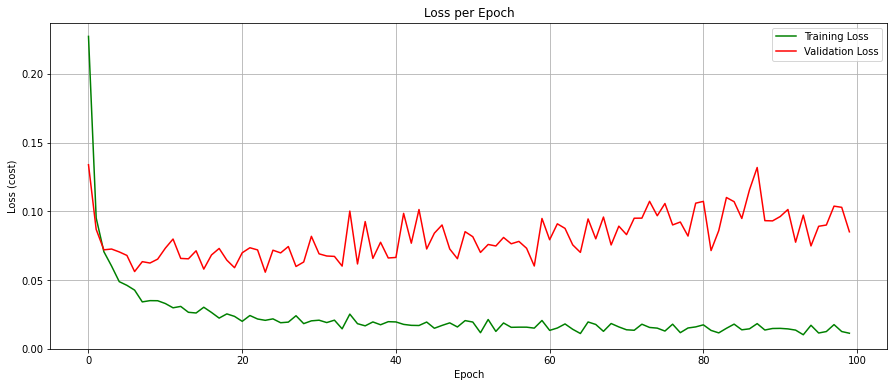

In [14]:
plot_loss_tf(history) 

### Ploting the accuracy for each epochs

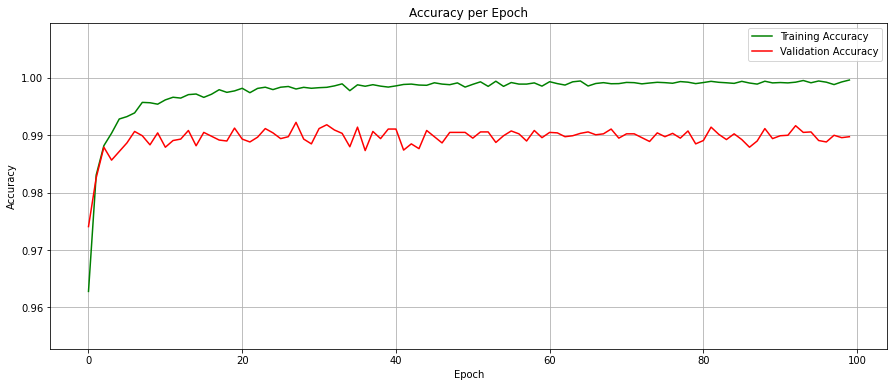

In [15]:
plot_accuracy_tf(history)

as we can see in our **ANN** model doesnt do on validation as well as in training

### Getting the total test Loss and Accuracy

In [16]:
test_score = ann_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', round(test_score[0],3))
print(f'Test Accuracy: {round(test_score[1],2)}%')

Test Loss: 0.145
Test Accuracy: 0.98%


###  Displaying Some Images and Its Predicted Value

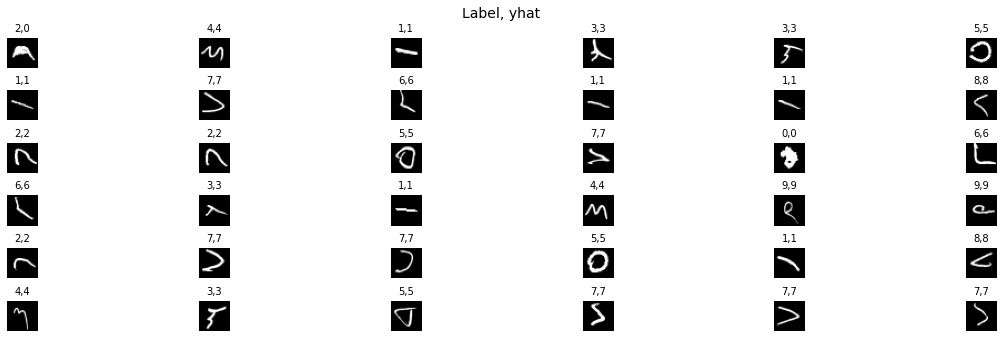

In [17]:
display_images_true_and_predication(ann_model, X_test, y_test, shape=(-1,784)) 

### Displaying Some misclassified images

173 errors out of 10000 images


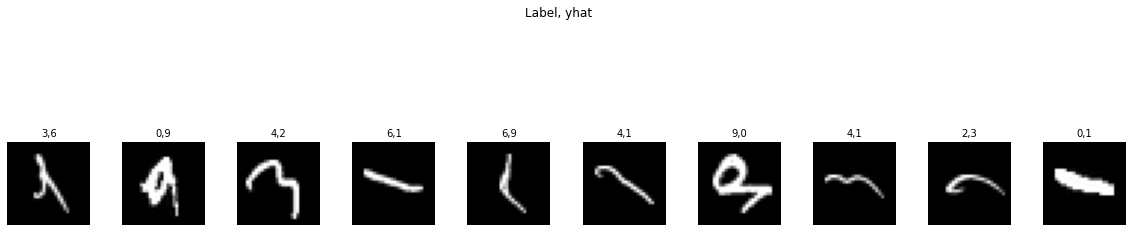

In [18]:
display_errors(ann_model, X_test, y_test, shape=(-1,784))

### Displaying the Confusion Matrix Of Model

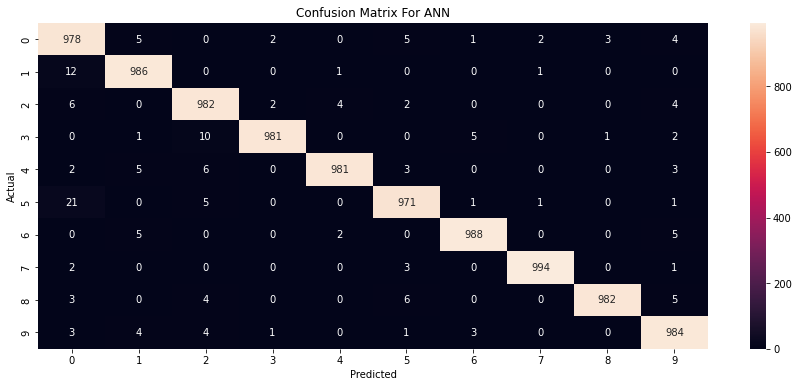

In [19]:
yhat_labels = [np.argmax(item) for item in ann_model.predict(X_test, verbose=0)]
plot_confusion_matrix(ann_model, X_test, y_test, yhat_labels, title="Confusion Matrix For ANN") 

### Checking the **precision**, **recall** **f1-score** of the model

In [20]:
print(classification_report(y_test, yhat_labels))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1000
           1       0.98      0.99      0.98      1000
           2       0.97      0.98      0.98      1000
           3       0.99      0.98      0.99      1000
           4       0.99      0.98      0.99      1000
           5       0.98      0.97      0.98      1000
           6       0.99      0.99      0.99      1000
           7       1.00      0.99      0.99      1000
           8       1.00      0.98      0.99      1000
           9       0.98      0.98      0.98      1000

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Our ANN ann_model has a **98%** accuracy on the test data.

<a id="cnn"></a>
## Building The CNN Model

In [21]:
X_train = X_train.reshape(-1,28,28,1) # Increasing one dimension for filter (kernal) operation
X_val = X_val.reshape(-1,28,28,1) # Increasing one dimension for filter (kernal) operation
X_test = X_test.reshape(-1,28,28,1) # Increasing one dimension for filter (kernal) operation

cnn_model = Sequential(
    [
        Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), name='conv_layer1',
               kernel_regularizer=regularizers.l2(0.001)),
        MaxPooling2D((2,2), name='pooling_layer1'),
        Conv2D(filters=32, kernel_size=(2,2), activation='relu', name='conv_layer2',
               kernel_regularizer=regularizers.l2(0.001)),
        MaxPooling2D((2,2), name='pooling_layer2'),
        Flatten(name='flatten_layer'),
        Dense(128, activation='relu', name='hidden_layer', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.25),
        Dense(10, activation='sigmoid', name='output_layer')
    ]
)
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = cnn_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2477 - accuracy: 0.9654 - val_loss: 0.1228 - val_accuracy: 0.9889
Epoch 2/100
1500/1500 [==============================] - 20s 14ms/step - loss: 0.1181 - accuracy: 0.9859 - val_loss: 0.1048 - val_accuracy: 0.9862
Epoch 3/100
1500/1500 [==============================] - 20s 14ms/step - loss: 0.1013 - accuracy: 0.9877 - val_loss: 0.0909 - val_accuracy: 0.9899
Epoch 4/100
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0937 - accuracy: 0.9879 - val_loss: 0.0819 - val_accuracy: 0.9908
Epoch 5/100
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0896 - accuracy: 0.9884 - val_loss: 0.0796 - val_accuracy: 0.9902
Epoch 6/100
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0840 - accuracy: 0.9893 - val_loss: 0.0838 - val_accuracy: 0.9891
Epoch 7/100
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0835 - accuracy: 0.9889 - val_loss: 0

1500/1500 [==============================] - 18s 12ms/step - loss: 0.0575 - accuracy: 0.9920 - val_loss: 0.0531 - val_accuracy: 0.9927
Epoch 57/100
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0559 - accuracy: 0.9918 - val_loss: 0.0543 - val_accuracy: 0.9924
Epoch 58/100
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0572 - accuracy: 0.9916 - val_loss: 0.0568 - val_accuracy: 0.9914
Epoch 59/100
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0570 - accuracy: 0.9921 - val_loss: 0.0548 - val_accuracy: 0.9936
Epoch 60/100
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0564 - accuracy: 0.9920 - val_loss: 0.0567 - val_accuracy: 0.9925
Epoch 61/100
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0579 - accuracy: 0.9911 - val_loss: 0.0521 - val_accuracy: 0.9937
Epoch 62/100
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0567 - accuracy: 0.9917 - val_loss: 0.0548 

In [22]:
cnn_model.summary() # Previewing the ann_model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer1 (Conv2D)        (None, 26, 26, 64)        640       
                                                                 
 pooling_layer1 (MaxPooling2  (None, 13, 13, 64)       0         
 D)                                                              
                                                                 
 conv_layer2 (Conv2D)        (None, 12, 12, 32)        8224      
                                                                 
 pooling_layer2 (MaxPooling2  (None, 6, 6, 32)         0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 1152)              0         
                                                                 
 hidden_layer (Dense)        (None, 128)              

<a id="cnn_eval"></a>
## Evaluating Our CNN

### Ploting the loss for each epochs

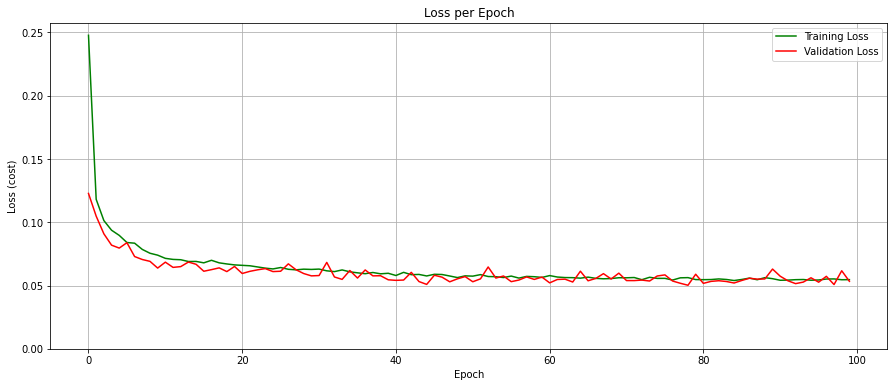

In [23]:
plot_loss_tf(history) 

### Ploting the accuracy for each epochs

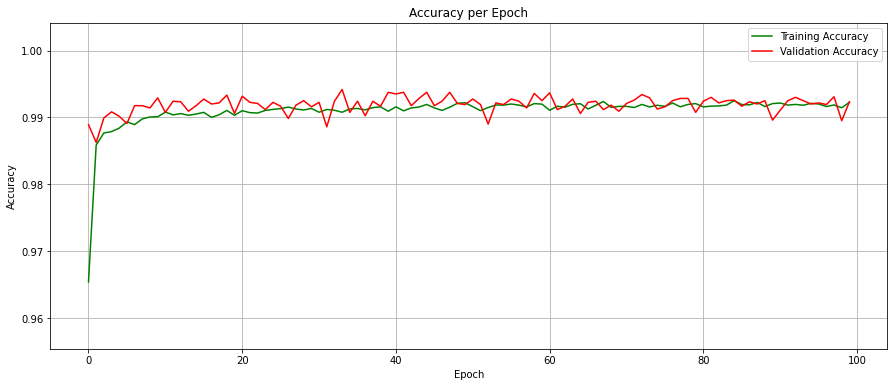

In [24]:
plot_accuracy_tf(history)

as we can see in our **CNN** model does better than our **ANN** model because it generalize well on our validation data

### Getting the total test Loss and Accuracy

In [25]:
test_score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', round(test_score[0],3))
print(f'Test Accuracy: {round(test_score[1],2)}%')

Test Loss: 0.073
Test Accuracy: 0.99%


###  Displaying Some Images and Its Predicted Value

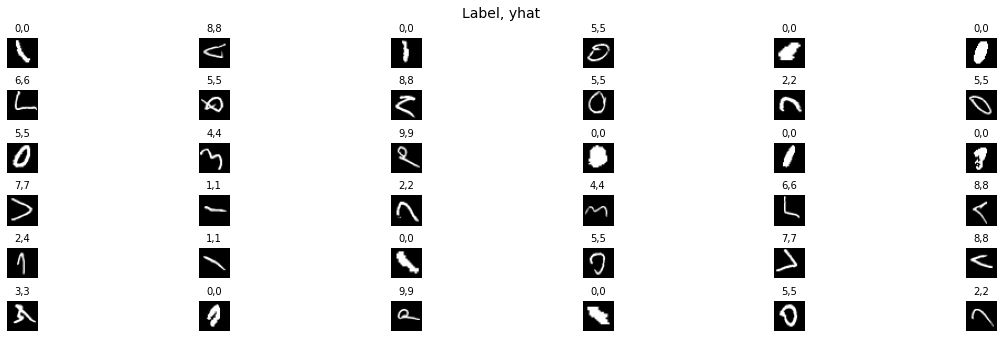

In [26]:
display_images_true_and_predication(cnn_model, X_test, y_test, shape=(-1,28,28,1)) 

### Displaying Some misclassified images

130 errors out of 10000 images


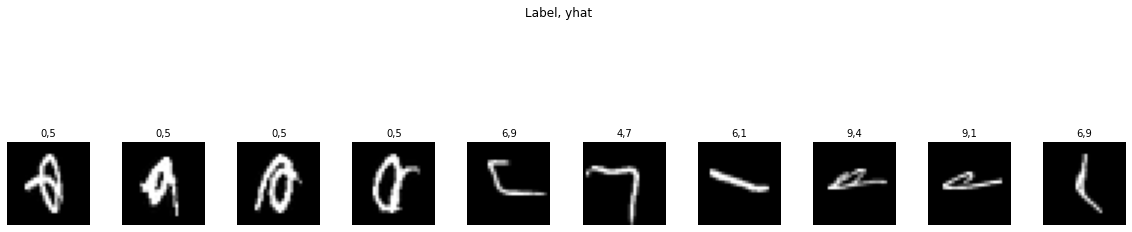

In [27]:
display_errors(cnn_model, X_test, y_test, shape=(-1,28,28,1))

### Displaying the Confusion Matrix Of Model

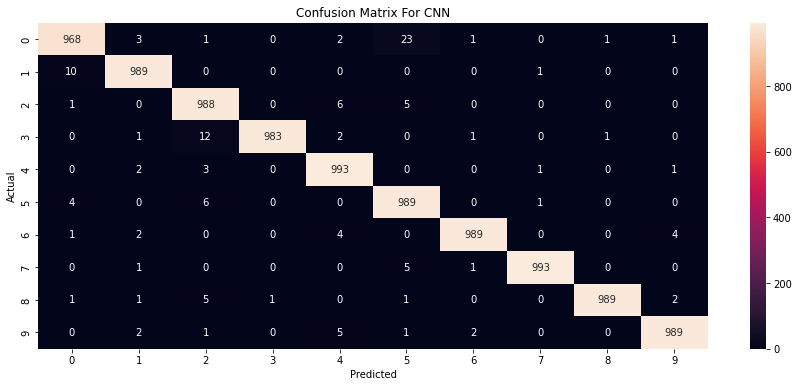

In [28]:
yhat_labels = [np.argmax(item) for item in cnn_model.predict(X_test, verbose=0)]
plot_confusion_matrix(cnn_model, X_test, y_test, yhat_labels, title="Confusion Matrix For CNN") 

### Checking the **precision**, **recall** **f1-score** of the model

In [29]:
print(classification_report(y_test, yhat_labels))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1000
           1       0.99      0.99      0.99      1000
           2       0.97      0.99      0.98      1000
           3       1.00      0.98      0.99      1000
           4       0.98      0.99      0.99      1000
           5       0.97      0.99      0.98      1000
           6       0.99      0.99      0.99      1000
           7       1.00      0.99      0.99      1000
           8       1.00      0.99      0.99      1000
           9       0.99      0.99      0.99      1000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Our CNN ann_model has a **99%** accuracy on the test data.

<a id='conclusion'></a>
## Conclusion

Our CNN Model is better than our ANN model because it did better on the validation and 
test data with a **99%** accuracy so we can say it can generalize well to new examples

## Saving  Models

In [30]:
# ann_model.save('ann_model.h5')
# cnn_model.save('cnn_model.h5')